# Exercício Visualização de Dados

**Dupla**: 

Gabriel Viana Raulino - 509291 

Kauan Oliveira Perdigão Lopes - 514867

Pergunta de pesquisa: **Quais bairros são mais afetados por problemas de infraestrutura?**


## **Considerações inicias:** 
### Foi utilizado um filtro no site do dataset para reduzir o tamanho do csv e remover previamente algumas informações desnecessárias.
### **Filtro 1**: Foi inserido apenas as ocorrências das datas entre 2020 Jan 01 12:00:00 AM a 2025 Jan 01 12:00:00 AM
### **Filtro 2**: Foi utilizado apenas as seguintes colunas
- **Created Date**
- **Complaint Type**
- **Location Type**
- **Street Name**
- **City**

In [22]:
import pandas as pd

df = pd.read_csv('311_Service.csv')

df

Created Date       Complaint Type  \
0         12/31/2024 11:59:38 PM    Illegal Fireworks   
1         12/31/2024 11:59:33 PM  Noise - Residential   
2         12/31/2024 11:59:32 PM  Noise - Residential   
3         12/31/2024 11:59:31 PM  Noise - Residential   
4         12/31/2024 11:59:21 PM  Noise - Residential   
...                          ...                  ...   
16016675  01/01/2020 12:00:00 AM       Food Poisoning   
16016676  01/01/2020 12:00:00 AM       Food Poisoning   
16016677  01/01/2020 12:00:00 AM       Food Poisoning   
16016678  01/01/2020 12:00:00 AM       Food Poisoning   
16016679  01/01/2020 12:00:00 AM       Food Poisoning   

                       Location Type          Street Name       City  
0                    Street/Sidewalk             AVENUE C        NaN  
1         Residential Building/House     EAST  230 STREET      BRONX  
2         Residential Building/House  MALCOLM X BOULEVARD   BROOKLYN  
3         Residential Building/House     EAST  230 STREET      BRONX  
4         Residential Building/House       NEWKIRK AVENUE   BROOKLYN  
...                              ...                  ...        ...  
16016675       Other (Explain Below)         UNION STREET   BROOKLYN  
16016676       Other (Explain Below)        CHURCH AVENUE   BROOKLYN  
16016677  Restaurant/Bar/Deli/Bakery      NOSTRAND AVENUE   BROOKLYN  
16016678  Restaurant/Bar/Deli/Bakery       JAMAICA AVENUE  Woodhaven  
16016679  Restaurant/Bar/Deli/Bakery      CORNELIA STREET  Ridgewood  

[16016680 rows x 5 columns]

#### Aqui podemos ver a quantidade de elementos null em cada coluna

In [23]:
value_counts = df[['Created Date','Complaint Type', 'Location Type', 'Street Name', 'City']].isnull().sum()
print(value_counts)
unique_values = df[['Created Date','Complaint Type', 'Location Type', 'Street Name', 'City']].nunique()
print(unique_values)


Created Date            0
Complaint Type          0
Location Type     2193372
Street Name        699039
City               860021
dtype: int64
Created Date      12793577
Complaint Type         266
Location Type          214
Street Name          19407
City                   548
dtype: int64


In [24]:
import warnings
warnings.filterwarnings('ignore')
# # Verificar valores ausentes nas colunas de interesse
# missing_values = df[['Created Date', 'Complaint Type', 'Location Type', 'Street Name', 'City']].isnull().sum()

# # Converter a coluna "Created Date" para o formato de data
# df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')

# # Exibir estatísticas dos valores ausentes
# missing_values

In [25]:
# Preenchimento de valores ausentes
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


df['Location Type'] = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])
df['Street Name'] = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

# Criar um dicionário de mapeamento "Street Name" -> "City" com a cidade mais frequente por rua
street_to_city = df.dropna(subset=['City']).groupby('Street Name')['City'].agg(lambda x: x.mode()[0]).to_dict()

# Preencher os valores ausentes na coluna "City" com base no mapeamento das ruas
df['City'] = df['City'].fillna(df['Street Name'].map(street_to_city))

# Verificar novamente os valores ausentes
missing_values_final = df[['Location Type', 'Street Name', 'City']].isnull().sum()

# Exibir os valores ausentes após tratamento
missing_values_final


Location Type    0
Street Name      0
City             0
dtype: int64

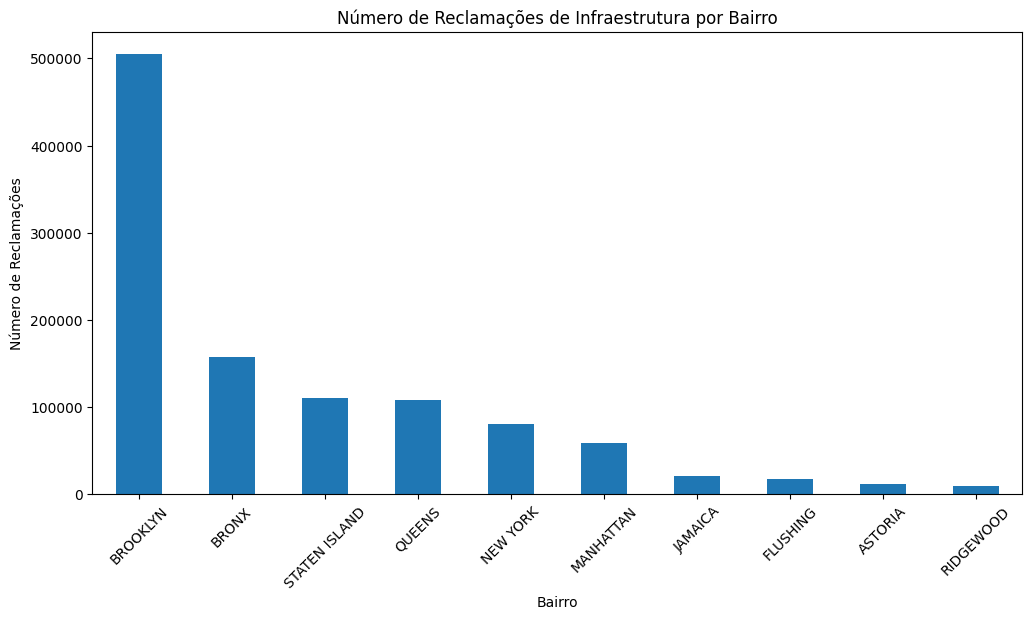

In [26]:
# Lista de tipos de reclamação relacionadas à infraestrutura urbana
infra_complaints = [
    "Street Condition", "Street Light Condition", "Sidewalk Condition", 
    "Building/Use", "Sewer", "Traffic Signal Condition", "Damaged Tree", "Construction"
]

# Filtrar apenas os dados de infraestrutura
df_infra = df[df['Complaint Type'].isin(infra_complaints)]

# Contar as reclamações por cidade
infra_complaints_by_city = df_infra['City'].value_counts().head(10)

# Exibir os dados em um gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
infra_complaints_by_city.plot(kind='bar')
plt.title("Número de Reclamações de Infraestrutura por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Número de Reclamações")
plt.xticks(rotation=45)
plt.show()


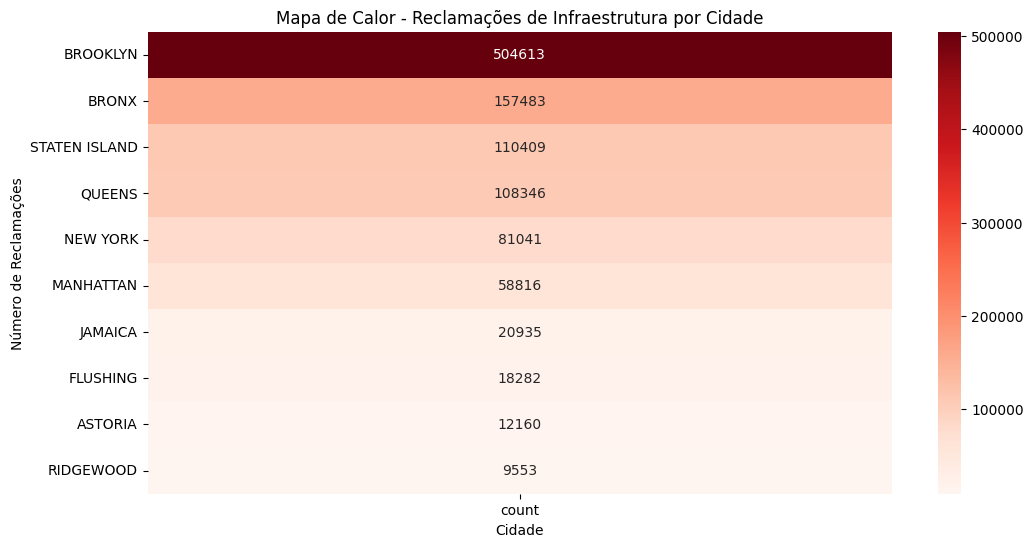

In [27]:
import seaborn as sns

# Criar um mapa de calor usando as cidades com mais reclamações
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(infra_complaints_by_city.head(10)), annot=True, cmap="Reds", fmt='d')
plt.title("Mapa de Calor - Reclamações de Infraestrutura por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Número de Reclamações")
plt.show()


In [31]:
import pandas as pd
import plotly.express as px

# Converter a coluna "Created Date" para o formato de data
# df['Created Date'] = pd.to_datetime(df['Created Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(df['Created Date'].head())

# Lista de categorias de reclamação relacionadas à infraestrutura
infra_complaints = [
    'Street Condition', 'Street Light Condition', 'Traffic Signal Condition', 
    'Sidewalk Condition', 'Illegal Parking', 'Sanitation Condition'
]

# Filtrar o DataFrame para incluir apenas reclamações relacionadas à infraestrutura
df_infra = df[df['Complaint Type'].isin(infra_complaints)]

# Criar uma nova coluna para o ano e mês
df_infra['Year-Month'] = df_infra['Created Date'].dt.to_period('M').astype(str)

# Criar um DataFrame para contagem de reclamações por cidade e por período
df_grouped = df_infra.groupby(['City', 'Year-Month']).size().reset_index(name='Count')

# Criar o gráfico interativo com Plotly
fig = px.bar(df_grouped, 
             x='City', 
             y='Count', 
             color='City', 
             animation_frame='Year-Month', 
             title="Reclamações de Infraestrutura por Cidade ao Longo do Tempo")

fig.show()

0   2024-12-31 23:59:38
1   2024-12-31 23:59:33
2   2024-12-31 23:59:32
3   2024-12-31 23:59:31
4   2024-12-31 23:59:21
Name: Created Date, dtype: datetime64[ns]


In [42]:

# Criar um DataFrame para contagem de reclamações por cidade e por período
df_infra['Year-Month'] = df_infra['Created Date'].dt.to_period('M').astype(str)
df_grouped = df_infra.groupby(['City', 'Year-Month']).size().reset_index(name='Count')

# Criar o gráfico interativo com Plotly
fig = px.bar(df_grouped,x='City',y='Count',color='City',animation_frame='Year-Month',title="Reclamações de Infraestrutura por Cidade ao Longo do Tempo")

fig.update_layout(width=1000)
fig.update_layout(height=800)
fig.update_layout(xaxis=dict(tickangle=-45))


# Exibir o gráfico
fig.show()
